In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df = df[(df['Quantity']> 0) & (df['UnitPrice'] > 0)]

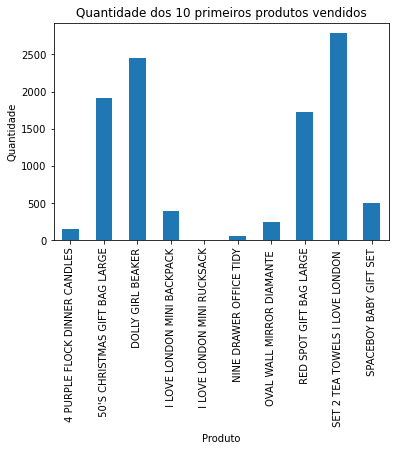

In [4]:
# 1) Faça um gráfico de barras mostrando a quantidade vendida total dos 10 
#    primeiros produtos que aparecem no Dataframe.
group_stock = df.groupby('Description')
group_stock.sum().iloc[0:10]['Quantity'].plot(kind = 'bar')
plt.title('Quantidade dos 10 primeiros produtos vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.show()

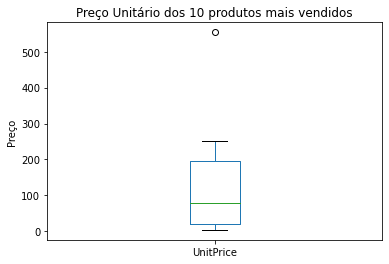

In [5]:
# 2) Faça um Boxplot dos preços unitários de todos os produtos. 
#    Considere somente os 10 produtos mais vendidos.

group_qtd = df.sort_values('Quantity' , ascending = False).groupby('StockCode')
group_qtd.sum().iloc[0:10]['UnitPrice'].plot(kind = 'box')
plt.title('Preço Unitário dos 10 produtos mais vendidos')
plt.ylabel('Preço')
plt.show()

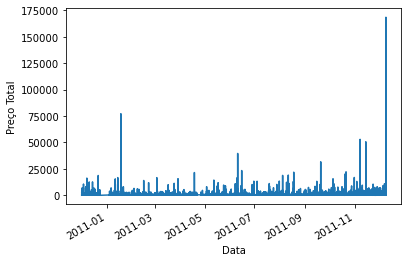

In [6]:
# 3) Faça um gráfico de linhas mostrando o faturamento (total de vendas) por dia.
# Precismos agrupar por data e somar
group_date = df.groupby('InvoiceDate')

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
group_date = df.groupby('InvoiceDate')
group_date.sum()['TotalPrice'].plot(kind = 'line')
plt.xlabel('Data')
plt.ylabel('Preço Total')
plt.show()

<AxesSubplot:ylabel='Frequency'>

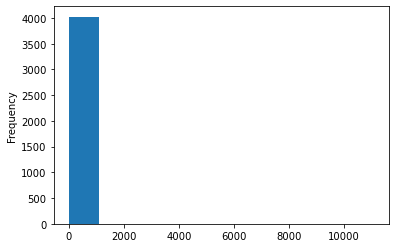

In [7]:
# 4) Faça o histograma dos preços unitários dos produtos.
group_stock.mean()['UnitPrice'].plot(kind = 'hist')

Text(0.5, 1.0, 'Quantidade de itens por país')

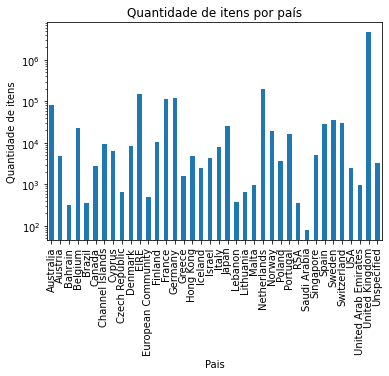

In [8]:
# 5) Faça um gráfico de barras da quantidade de compras e do total de faturamento por país.
# Agrupar por pais 
paises = df.groupby('Country')
paises.sum()['Quantity'].plot(kind='bar')
plt.yscale('log')
plt.xlabel('Pais')
plt.ylabel('Quantidade de itens')
plt.title('Quantidade de itens por país')

Text(0.5, 1.0, 'Valor total de compras por país')

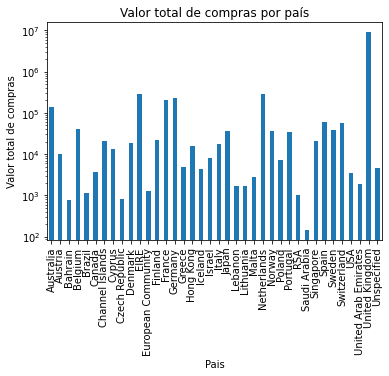

In [9]:
paises.sum()['TotalPrice'].plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('Pais')
plt.ylabel('Valor total de compras')
plt.title('Valor total de compras por país')

<ipython-input-10-81aaf6e236aa>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  australia = df.sort_values('Quantity', ascending = False)[df['Country'] == 'Australia'].groupby('StockCode')


Text(0.5, 1.0, 'Frequência por preço unitário dos 100 produtos mais comprados Austrália')

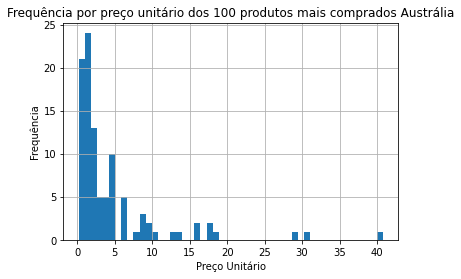

In [10]:
# 6) Considerando os 100 produtos mais vendidos, é possível visualizar alguma diferença entre a 
#    distribuição dos preços unitários desses produtos ao se comparar com os países "Australia" 
#    e "United Kingdom"?

australia = df.sort_values('Quantity', ascending = False)[df['Country'] == 'Australia'].groupby('StockCode')
australia .sum().iloc[0:100]['UnitPrice'].hist(bins = 50)
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.title('Frequência por preço unitário dos 100 produtos mais comprados Austrália')

<ipython-input-11-a82754bf3526>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uKingdom = df.sort_values('Quantity', ascending = False)[df['Country'] == 'United Kingdom'].groupby('StockCode')


Text(0.5, 1.0, 'Frequência por preço unitário dos 100 produtos mais comprados Reino Unido')

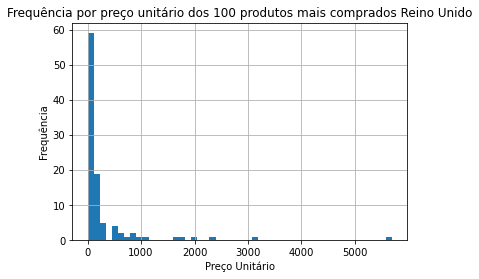

In [11]:
uKingdom = df.sort_values('Quantity', ascending = False)[df['Country'] == 'United Kingdom'].groupby('StockCode')
uKingdom .sum().iloc[0:100]['UnitPrice'].hist(bins = 50)
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.title('Frequência por preço unitário dos 100 produtos mais comprados Reino Unido')

<AxesSubplot:>

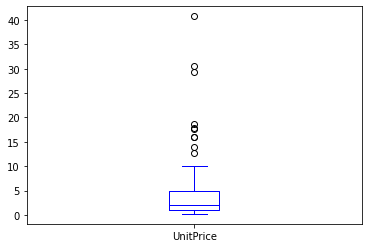

In [12]:
australia.sum().iloc[0:100]['UnitPrice'].plot(kind = 'box', color = 'b')

<AxesSubplot:>

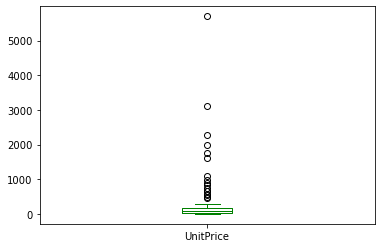

In [13]:
uKingdom.sum().iloc[0:100]['UnitPrice'].plot(kind = 'box', color = 'g')

O Reino Unido possui maior quantidade de produtos mais frequentes em relação à Austrália.
Isso é esperado, pois o Reino Unido é o país com mais relações de compras.
